In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.models import Sequential

In [66]:
xTrain = np.load('xTrain.npy', allow_pickle=True)
yTrain = np.load('yTrain.npy', allow_pickle=True)
xVal = np.load('xVal.npy', allow_pickle=True)
yVal = np.load('yVal.npy', allow_pickle=True)
xTest = np.load('xTest.npy', allow_pickle=True)
yTest = np.load('yTest.npy', allow_pickle=True)

xTrain = xTrain.reshape((234,25,1))
xVal = xVal.reshape((78,25,1))
xVal = xVal[:72]
yVal = yVal[:72]
xTest = xTest.reshape((79,25,1))
xTest = xTest[:72]
yTest = yTest[:72]

print(xTrain.shape, yTrain.shape, xVal.shape, yVal.shape, xTest.shape, yTest.shape)

(234, 25, 1) (234, 15) (72, 25, 1) (72, 15) (72, 25, 1) (72, 15)


In [67]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, X, y, n_classes, shuffle):
        'Initialization'
        self.X = X
        self.y = y
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return 1

    def __getitem__(self, index):
        'Generate one batch of data'
        X = self.X + 0.1*np.random.randn()
        y = self.y
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.X))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [68]:
training_generator = DataGenerator(xTrain, yTrain, n_classes=15, shuffle=False)
validation_generator = DataGenerator(xVal, yVal, n_classes=15, shuffle=False)

for i in range(len(training_generator)):
    item = training_generator.__getitem__(i)
    print(item, item[0].shape, item[1].shape)

(array([[[-0.80354153],
        [-0.79081503],
        [-0.79081503],
        ...,
        [-0.80354153],
        [ 3.82678555],
        [ 3.82678555]],

       [[-0.8077837 ],
        [-0.81626804],
        [-0.81626804],
        ...,
        [ 0.53910485],
        [ 0.28245364],
        [ 0.28245364]],

       [[-0.8077837 ],
        [-0.8077837 ],
        [-0.8077837 ],
        ...,
        [ 1.16800635],
        [ 0.64303798],
        [ 0.64303798]],

       ...,

       [[-0.96474394],
        [-0.96474394],
        [-0.96474394],
        ...,
        [ 3.86602561],
        [ 0.7215181 ],
        [ 0.7215181 ]],

       [[-0.96050177],
        [-0.96050177],
        [-0.96050177],
        ...,
        [-0.44719937],
        [-0.13433943],
        [-0.13433943]],

       [[ 0.73000243],
        [ 0.73000243],
        [ 0.73000243],
        ...,
        [-0.28281533],
        [ 0.19124702],
        [ 0.19124702]]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 

In [69]:
inputs = Input(shape=(25, 1), batch_size=9)
x = LSTM(128, stateful=True)(inputs)
x = Dropout(0.1)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(32, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(15, activation="softmax")(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', \
    metrics=[tf.keras.metrics.CategoricalAccuracy()]) #Adam
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(9, 25, 1)]              0         
_________________________________________________________________
lstm_26 (LSTM)               (9, 128)                  66560     
_________________________________________________________________
dropout_38 (Dropout)         (9, 128)                  0         
_________________________________________________________________
dense_51 (Dense)             (9, 128)                  16512     
_________________________________________________________________
dropout_39 (Dropout)         (9, 128)                  0         
_________________________________________________________________
dense_52 (Dense)             (9, 64)                   8256      
_________________________________________________________________
dropout_40 (Dropout)         (9, 64)                   0  

In [70]:
history = model.fit(xTrain, yTrain, validation_data=(xVal, yVal), epochs=200)

Train on 234 samples, validate on 72 samples
Epoch 1/200
234/234 [==============================] - 2s 9ms/sample - loss: 2.6966 - categorical_accuracy: 0.0897 - val_loss: 2.6753 - val_categorical_accuracy: 0.1944
Epoch 2/200
234/234 [==============================] - 0s 1ms/sample - loss: 2.6715 - categorical_accuracy: 0.1752 - val_loss: 2.6331 - val_categorical_accuracy: 0.1944
Epoch 3/200
234/234 [==============================] - 0s 1ms/sample - loss: 2.6307 - categorical_accuracy: 0.2094 - val_loss: 2.5680 - val_categorical_accuracy: 0.1944
Epoch 4/200
234/234 [==============================] - 0s 1ms/sample - loss: 2.5419 - categorical_accuracy: 0.2521 - val_loss: 2.4087 - val_categorical_accuracy: 0.4861
Epoch 5/200
234/234 [==============================] - 0s 1ms/sample - loss: 2.3944 - categorical_accuracy: 0.2650 - val_loss: 2.3657 - val_categorical_accuracy: 0.4028
Epoch 6/200
234/234 [==============================] - 0s 1ms/sample - loss: 2.2685 - categorical_accuracy: 0.

Epoch 49/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.6855 - categorical_accuracy: 0.3974 - val_loss: 1.9015 - val_categorical_accuracy: 0.5139
Epoch 50/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.6939 - categorical_accuracy: 0.4060 - val_loss: 1.8889 - val_categorical_accuracy: 0.4861
Epoch 51/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.7215 - categorical_accuracy: 0.4017 - val_loss: 1.8679 - val_categorical_accuracy: 0.5278
Epoch 52/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.7300 - categorical_accuracy: 0.4231 - val_loss: 1.9275 - val_categorical_accuracy: 0.5000
Epoch 53/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.6613 - categorical_accuracy: 0.4444 - val_loss: 1.8343 - val_categorical_accuracy: 0.5139
Epoch 54/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.6424 - categorical_accuracy: 0.4359 - val_loss: 1.9062 - val_categoric

234/234 [==============================] - 0s 2ms/sample - loss: 1.6018 - categorical_accuracy: 0.4530 - val_loss: 2.0622 - val_categorical_accuracy: 0.5278
Epoch 98/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.6496 - categorical_accuracy: 0.4231 - val_loss: 2.0809 - val_categorical_accuracy: 0.5278
Epoch 99/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.5812 - categorical_accuracy: 0.4444 - val_loss: 2.0415 - val_categorical_accuracy: 0.5278
Epoch 100/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.6008 - categorical_accuracy: 0.4359 - val_loss: 2.1228 - val_categorical_accuracy: 0.5278
Epoch 101/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.5751 - categorical_accuracy: 0.4444 - val_loss: 2.0979 - val_categorical_accuracy: 0.4861
Epoch 102/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.5830 - categorical_accuracy: 0.4487 - val_loss: 2.0805 - val_categorical_accurac

234/234 [==============================] - 0s 2ms/sample - loss: 1.5124 - categorical_accuracy: 0.4701 - val_loss: 2.3020 - val_categorical_accuracy: 0.5000
Epoch 146/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.5197 - categorical_accuracy: 0.4444 - val_loss: 2.2545 - val_categorical_accuracy: 0.5278
Epoch 147/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.5858 - categorical_accuracy: 0.4274 - val_loss: 2.1095 - val_categorical_accuracy: 0.4722
Epoch 148/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.5511 - categorical_accuracy: 0.4359 - val_loss: 2.1520 - val_categorical_accuracy: 0.4722
Epoch 149/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.5309 - categorical_accuracy: 0.4487 - val_loss: 2.1938 - val_categorical_accuracy: 0.5278
Epoch 150/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.5237 - categorical_accuracy: 0.4274 - val_loss: 2.3091 - val_categorical_accur

Epoch 193/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.4798 - categorical_accuracy: 0.4316 - val_loss: 2.3891 - val_categorical_accuracy: 0.3611
Epoch 194/200
234/234 [==============================] - 0s 2ms/sample - loss: 1.4598 - categorical_accuracy: 0.4829 - val_loss: 2.3187 - val_categorical_accuracy: 0.3611
Epoch 195/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.4727 - categorical_accuracy: 0.4530 - val_loss: 2.4061 - val_categorical_accuracy: 0.3611
Epoch 196/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.4213 - categorical_accuracy: 0.4744 - val_loss: 2.4682 - val_categorical_accuracy: 0.3611
Epoch 197/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.4626 - categorical_accuracy: 0.4829 - val_loss: 2.3587 - val_categorical_accuracy: 0.3611
Epoch 198/200
234/234 [==============================] - 0s 1ms/sample - loss: 1.4558 - categorical_accuracy: 0.4915 - val_loss: 2.3492 - val_cat

In [71]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

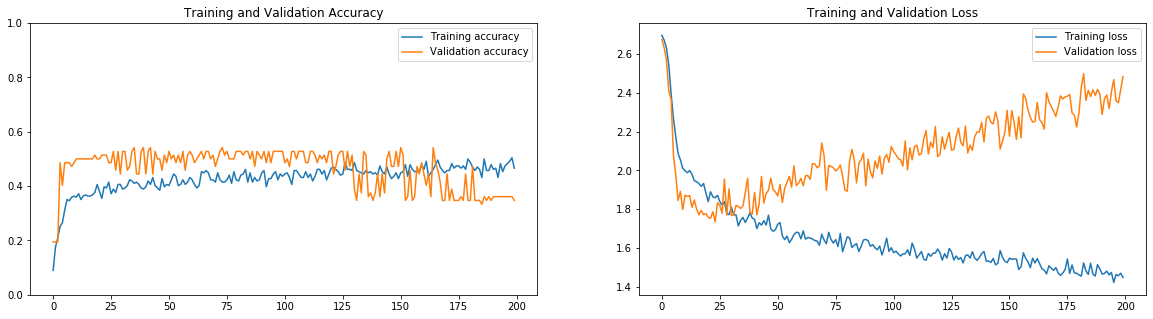

In [72]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.ylim(0,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and Validation Accuracy')
plt.legend(labels=['Training accuracy', 'Validation accuracy'], loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(labels=['Training loss', 'Validation loss'], loc='best')

plt.show()

In [41]:
pred = model.predict(xTest)

In [42]:
result = [(np.argmax(pred[i]), np.argmax(yTest[i])) for i in range(len(pred))]
for row in result:
    print(row, end=' ')

(0, 0) (0, 0) (0, 0) (0, 0) (14, 0) (14, 0) (6, 0) (7, 0) (14, 0) (14, 0) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (7, 10) (6, 10) (6, 9) (6, 9) (4, 8) (14, 8) (7, 7) (7, 7) (7, 6) (7, 6) (7, 5) (7, 5) (7, 4) (7, 4) (7, 3) (7, 3) (7, 2) (7, 2) (7, 1) (7, 1) (6, 0) (6, 0) (6, 0) (0, 0) (0, 0) (0, 0) (14, 0) (14, 0) (14, 0) (14, 0) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 14) (14, 9) (7, 8) (7, 8) (6, 7) (6, 7) (14, 6) (0, 6) (0, 5) (0, 5) (0, 4) (0, 4) (0, 3) (0, 3) (0, 2) (0, 2) 

In [ ]:
print(result[0])
plt.plot(xTest[0])
plt.ylim(-1,5)
plt.show()

In [73]:
model.save('LSTM_model2.h5')